In [1]:
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
crime_dat = pd.read_csv("Crime_Incident_Reports__July_2012_-_August_2015___Source__Legacy_System_.csv")

In [4]:
crime_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268056 entries, 0 to 268055
Data columns (total 20 columns):
COMPNOS                      255797 non-null float64
NatureCode                   266391 non-null object
INCIDENT_TYPE_DESCRIPTION    268056 non-null object
MAIN_CRIMECODE               268056 non-null object
REPTDISTRICT                 267699 non-null object
REPORTINGAREA                268056 non-null int64
FROMDATE                     268056 non-null object
WEAPONTYPE                   268056 non-null object
Shooting                     268056 non-null object
DOMESTIC                     268056 non-null object
SHIFT                        255791 non-null object
Year                         268056 non-null int64
Month                        268056 non-null int64
DAY_WEEK                     268056 non-null object
UCRPART                      268056 non-null object
X                            253075 non-null float64
Y                            253075 non-null float64
STREE

There are some missing values

In [5]:
crime_dat.shape

(268056, 20)

In [6]:
crime_dat.apply(lambda x: x.isnull().any())

COMPNOS                       True
NatureCode                    True
INCIDENT_TYPE_DESCRIPTION    False
MAIN_CRIMECODE               False
REPTDISTRICT                  True
REPORTINGAREA                False
FROMDATE                     False
WEAPONTYPE                   False
Shooting                     False
DOMESTIC                     False
SHIFT                         True
Year                         False
Month                        False
DAY_WEEK                     False
UCRPART                      False
X                             True
Y                             True
STREETNAME                    True
XSTREETNAME                   True
Location                     False
dtype: bool

In [7]:
crime_dat.apply(lambda x: x.isnull().sum()/float(crime_dat.shape[0]))

COMPNOS                      0.045733
NatureCode                   0.006211
INCIDENT_TYPE_DESCRIPTION    0.000000
MAIN_CRIMECODE               0.000000
REPTDISTRICT                 0.001332
REPORTINGAREA                0.000000
FROMDATE                     0.000000
WEAPONTYPE                   0.000000
Shooting                     0.000000
DOMESTIC                     0.000000
SHIFT                        0.045755
Year                         0.000000
Month                        0.000000
DAY_WEEK                     0.000000
UCRPART                      0.000000
X                            0.055888
Y                            0.055888
STREETNAME                   0.000873
XSTREETNAME                  0.818389
Location                     0.000000
dtype: float64

most of the cols has less than 5% of missing data except Xstreetname which has more than 80% of missing data. Droping XSTREETNAME

In [8]:
#COMPNOS is an ID col which is not useful for EDA
crime_dat.drop(['XSTREETNAME','COMPNOS'], axis = 1, inplace= True)

In [9]:
crime_dat.columns = crime_dat.columns.str.lower()

In [10]:
crime_dat.fromdate = pd.to_datetime(crime_dat.fromdate)

In [11]:
crime_dat['hour'] = crime_dat.fromdate.dt.hour
crime_dat['day_m'] = crime_dat.fromdate.dt.daysinmonth
crime_dat['month'] = crime_dat.fromdate.dt.month

In [12]:
crime_dat.head()

,naturecode,incident_type_description,main_crimecode,reptdistrict,reportingarea,fromdate,weapontype,shooting,domestic,shift,year,month,day_week,ucrpart,x,y,streetname,location,hour,day_m
0,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,2012-07-08 06:00:00,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,"(42.34638135, -71.10379454)",6,31
1,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,2012-07-08 06:03:00,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,"(42.31684135, -71.07458456)",6,31
2,ARMROB,ROBBERY,03xx,D4,625,2012-07-08 06:26:00,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,"(42.34284135, -71.09698955)",6,31
3,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,2012-07-08 06:56:00,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,"(42.3164411, -71.06582908)",6,31
4,ARMROB,ROBBERY,03xx,E18,496,2012-07-08 07:15:00,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,"(42.27051636, -71.11989955)",7,31


In [13]:
#Preprocessing on incident desc
#Better descriptions of superset of crimes would help in making better decisions
crime_dat.incident_type_description = crime_dat.incident_type_description.str.lower()
#embezellment,searchwarr
crime_dat.incident_type_description.replace(to_replace=['embezellment','embezzlement'], value='embezelment',inplace=True)
crime_dat.incident_type_description.replace(to_replace='searchwarr', value='search warrants', inplace=True)

In [14]:
crime_dat.year.min(),crime_dat.year.max()

(2012, 2015)

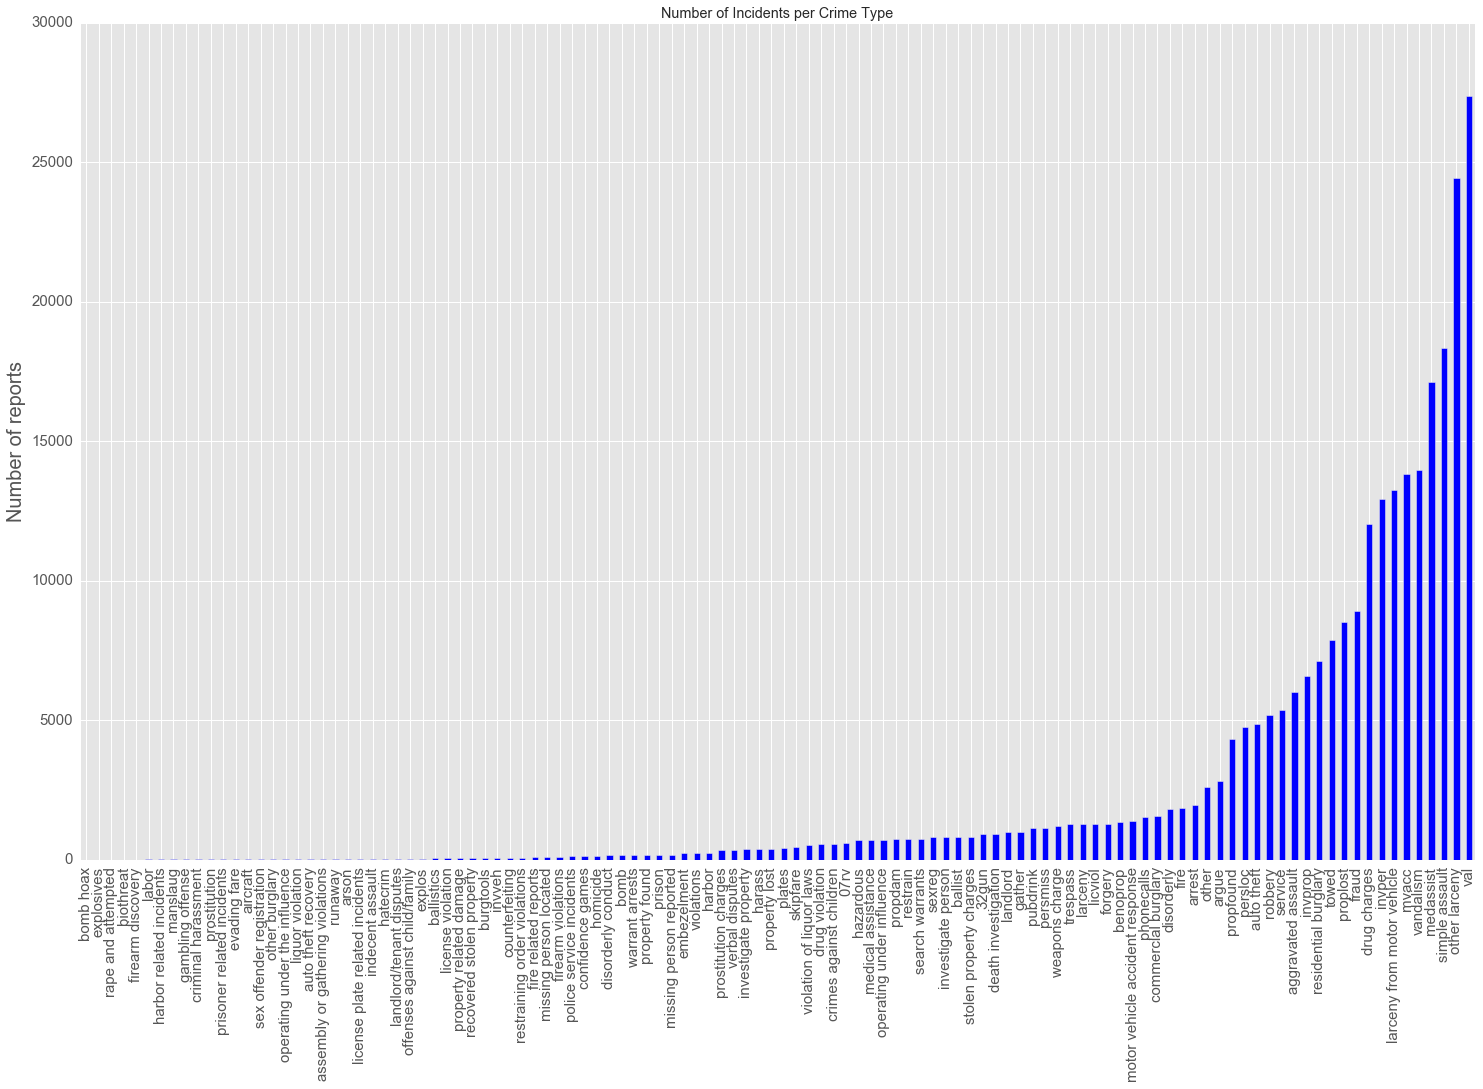

In [15]:
incident_type = crime_dat.groupby('incident_type_description').size().sort_values()
fig=plt.figure(figsize=(25,15))
plt.yticks(fontsize= 10)
incident_type.plot(kind='bar',fontsize=15,color='b')
plt.xlabel('')
plt.ylabel('Number of reports',fontsize=20)
plt.title("Number of Incidents per Crime Type")

In [17]:
#There are 127 unique incident types 
np.unique(crime_dat.incident_type_description).shape

(112,)

In [18]:
np.unique(crime_dat.reptdistrict).shape

(14,)

In [19]:
pd.pivot_table(crime_dat[['incident_type_description','streetname']], columns= 'incident_type_description', \
               index='streetname', fill_value=0, aggfunc=len)

incident_type_description,07rv,32gun,aggravated assault,aircraft,argue,arrest,arson,assembly or gathering violations,auto theft,auto theft recovery,ballist,ballistics,benoprop,biothreat,bomb,bomb hoax,burgtools,commercial burglary,confidence games,counterfeiting,crimes against children,criminal harassment,death investigation,disorderly,disorderly conduct,drug charges,drug violation,embezelment,evading fare,explos,...,property lost,property related damage,propfound,proplost,prostitution,prostitution charges,pubdrink,rape and attempted,recovered stolen property,residential burglary,restrain,restraining order violations,robbery,runaway,search warrants,service,sex offender registration,sexreg,simple assault,skipfare,stolen property charges,towed,trespass,val,vandalism,verbal disputes,violation of liquor laws,violations,warrant arrests,weapons charge
streetname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALBANY ST,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COMMONWEALTH AVE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
MASSACHUSETTS AVE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
132 BROOK AVE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13TH ST,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,2,2,0,2,0,0,0,0,0,5,0,0,2,2,2,0,0,0,0,0,0
16TH ST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1ST AV,0,0,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,3,7,0,0,0,0,0,1,0,0,1,0,0,2,0,0,6,0,2,1,0,10,3,0,0,0,0,0
2ND AV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3RD AV,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,1,0,0,1,4,2,0,0,0,0,0


In [20]:
#Common crime by hour
crime_hour = pd.pivot_table(crime_dat[['incident_type_description','hour']], columns= 'hour', \
               index='incident_type_description', fill_value=0, aggfunc=len)

In [21]:
crime_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
incident_type_description,,,,,,,,,,,,,,,,,,,,,,,,
07rv,28,17,14,9,4,4,6,4,29,42,57,46,55,35,43,24,52,39,20,26,15,21,14,9
32gun,16,14,5,5,6,2,7,9,25,40,53,63,126,94,104,62,71,72,46,37,23,15,8,12
aggravated assault,596,374,389,162,135,73,74,75,111,148,177,188,211,228,284,271,310,316,306,293,323,334,304,326
aircraft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,2,3,3,2,3,0,1,1
argue,103,88,63,44,41,41,30,60,101,130,149,147,159,139,176,147,163,169,180,164,149,159,148,83
arrest,51,61,42,23,17,11,38,49,208,198,179,166,128,94,107,67,62,111,107,66,41,58,55,20
arson,3,1,0,0,2,0,0,0,0,0,1,3,1,1,1,3,3,0,1,3,2,3,3,2
assembly or gathering violations,25,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0
auto theft,377,152,122,63,53,59,86,121,179,166,155,159,252,157,168,185,210,257,301,316,338,322,335,318


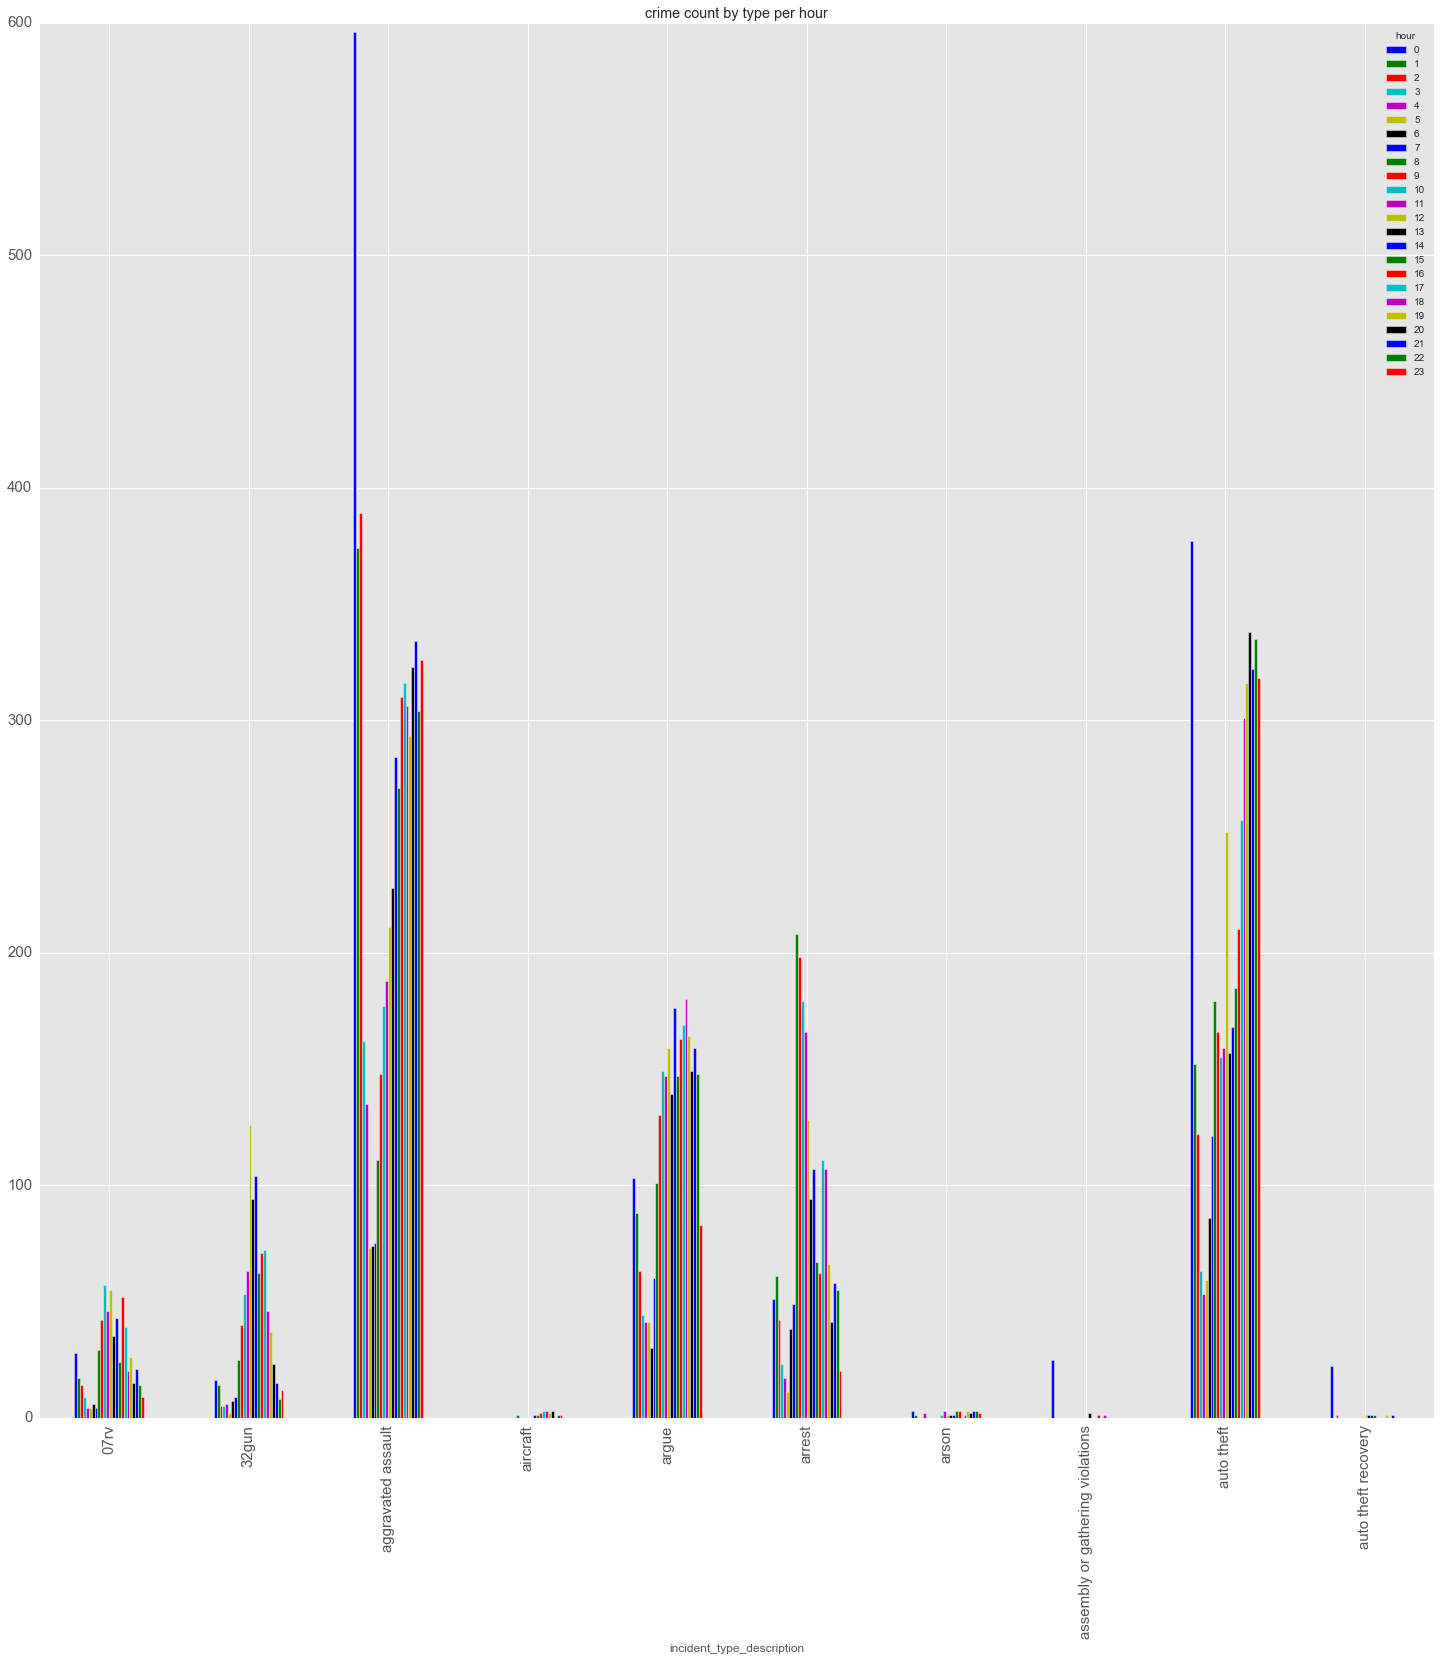

In [22]:
crime_hour[:10].plot(kind='bar',sort_columns= True, legend = True, figsize= (25,25),\
               title = "crime count by type per hour", fontsize = 15)

#We can draw some interesting insights based on the hour type of crime.

In [23]:
#Only last 3 days of a month is present in the data. This needs further investigation even though 
#no. of records per full year looks good.
crime_dat.day_m.value_counts(sort=True)

31    162995
30     86600
28     18461
Name: day_m, dtype: int64

In [24]:
crime_dat.year.value_counts()

2014    88058
2013    87052
2015    49760
2012    43186
Name: year, dtype: int64

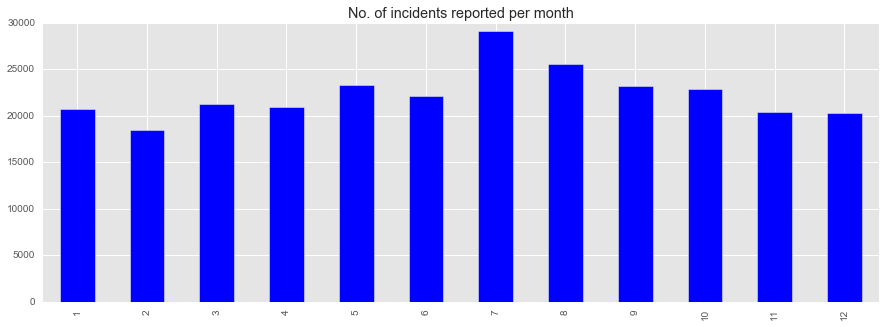

In [25]:
crime_dat.month.value_counts().sort_index()\
.plot(kind = 'bar', title = "No. of incidents reported per month")
#No. of incidents reported per month looks almost uniform

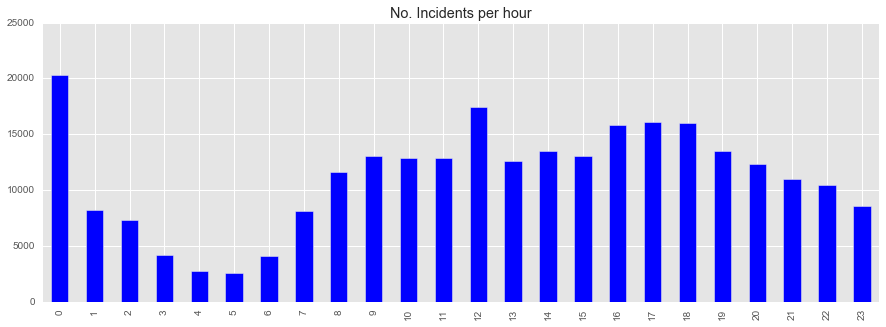

In [26]:
crime_dat.hour.value_counts().sort_index().plot(kind = 'bar', title = 'No. Incidents per hour')
#Crime is more rampant between 16:00 and 0:00 hrs

In [27]:
crime_dat.main_crimecode.unique().shape

(77,)

In [28]:
def crime_street(df,per):
    
    # Group by crime type and street 
    hoods_per_type=df.groupby('incident_type_description').streetname.value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum.sort(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum.sort()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=crime_street(crime_dat,96).T


In [29]:
t

incident_type_description,vandalism,medassist,simple assault,other larceny,val
streetname,,,,,
WASHINGTON ST,456,756,987,1933,1247
BOYLSTON ST,155,211,410,1949,267
BLUE HILL AV,161,257,470,504,885
DORCHESTER AV,190,335,354,400,597
TREMONT ST,179,253,361,684,391
MASSACHUSETTS AV,119,317,321,587,422
COMMONWEALTH AV,215,211,205,390,497
CENTRE ST,135,250,223,432,442
HARRISON AV,62,134,234,377,169


In [30]:
assault = crime_dat[crime_dat['incident_type_description']  == 'aggravated assault'][['fromdate','incident_type_description']]
assault['date'] = assault.fromdate.dt.date
assault.drop('fromdate', axis =1 , inplace = True)
assault.head()

,incident_type_description,date
1,aggravated assault,2012-07-08
46,aggravated assault,2012-07-08
88,aggravated assault,2012-07-08
109,aggravated assault,2012-07-08
153,aggravated assault,2012-07-08


In [31]:
crime_dat['date'] = crime_dat.fromdate.dt.date

In [32]:
incidents = crime_dat.groupby(['incident_type_description','date'])[['incident_type_description']]\
.count()\
.unstack(level = -1)\
.fillna(0).T

In [33]:
incidents = incidents.reset_index(1).reset_index(drop = True).set_index('date')
incidents.index = incidents.index.astype('datetime64[ns]')

In [34]:
weekly = incidents.apply(lambda x : x.resample('W',how='sum'))
monthly = incidents.apply(lambda x : x.resample('M', how = 'sum'))

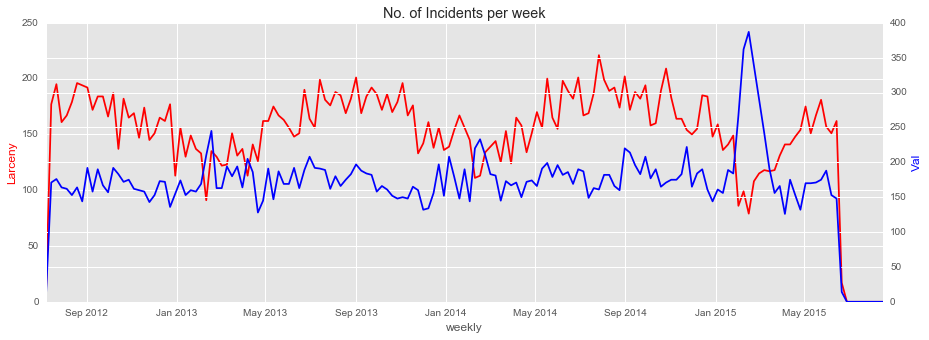

In [35]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly.index, weekly['other larceny'], 'r-')
ax2.plot(weekly.index, weekly.val, 'b-')

ax1.set_xlabel('weekly')
ax1.set_ylabel('Larceny', color='r')
ax2.set_ylabel('Val', color='b')
plt.title("No. of Incidents per week")

plt.show()
plt.rcParams['figure.figsize'] = 8,20
#overlap every feb 

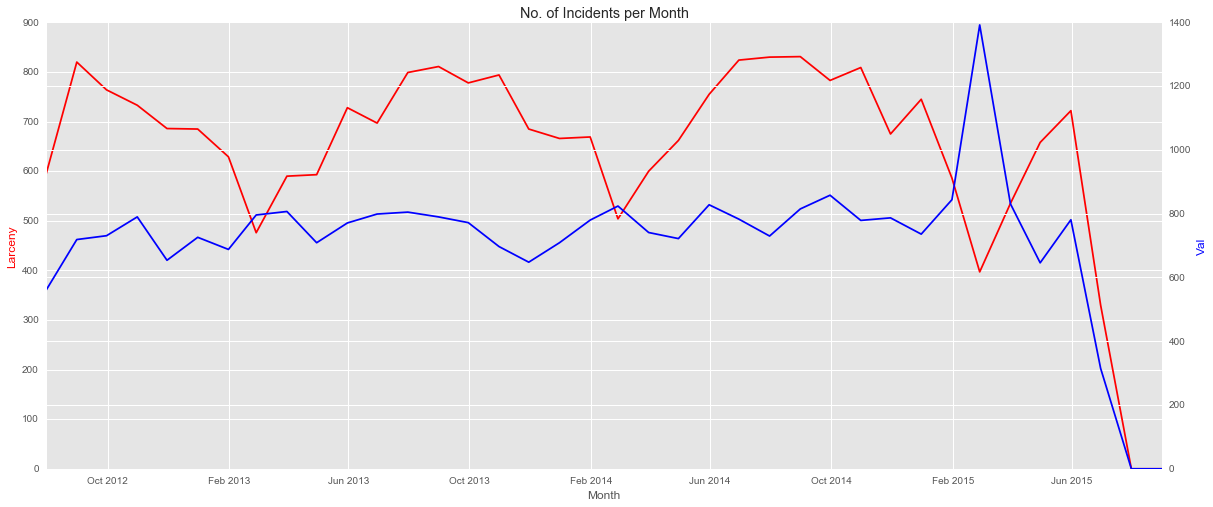

TypeError: object of type 'bool' has no len()

In [44]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(monthly.index, monthly['other larceny'], 'r-')
ax2.plot(monthly.index, monthly.val, 'b-')

ax1.set_xlabel('Month')
ax1.set_ylabel('Larceny', color='r')
ax2.set_ylabel('Val', color='b')
plt.title("No. of Incidents per Month")

plt.show()
plt.rcParams['figure.figsize'] = 8,20


In [37]:
crime_dat.weapontype.value_counts()

Unarmed                               194932
Other                                  52102
None                                   11319
Firearm                                 5299
Knife                                   3867
Personal Weapon (hand  foot  etc.)       282
Knife/Cutting Instrument                 177
Blunt Object                              78
Name: weapontype, dtype: int64

In [38]:
weapon = crime_dat[['streetname','weapontype']]

In [39]:
weapon.groupby('streetname').weapontype.value_counts().unstack().fillna(0)
#gives the most frequently used weapon in each street

weapontype,Blunt Object,Firearm,Knife,Knife/Cutting Instrument,None,Other,Personal Weapon (hand foot etc.),Unarmed
streetname,,,,,,,,
ALBANY ST,0,0,0,0,9,1,0,0
COMMONWEALTH AVE,0,0,0,0,2,1,0,0
MASSACHUSETTS AVE,0,0,0,0,5,1,0,0
132 BROOK AVE,0,0,0,1,0,0,0,0
13TH ST,0,1,0,0,0,10,0,48
16TH ST,0,0,0,0,0,1,0,7
1ST AV,0,1,3,0,0,30,0,95
2ND AV,0,0,0,0,0,2,0,7
3RD AV,0,0,0,0,0,13,0,48


In [40]:
#Top 10 street with most crimes
crime_dat.streetname.value_counts().sort_values(ascending= False)[:10]

WASHINGTON ST       14552
BOYLSTON ST          6572
BLUE HILL AV         6172
DORCHESTER AV        4549
TREMONT ST           4447
MASSACHUSETTS AV     4434
COMMONWEALTH AV      4345
CENTRE ST            3903
HARRISON AV          3005
HYDE PARK AV         2897
Name: streetname, dtype: int64

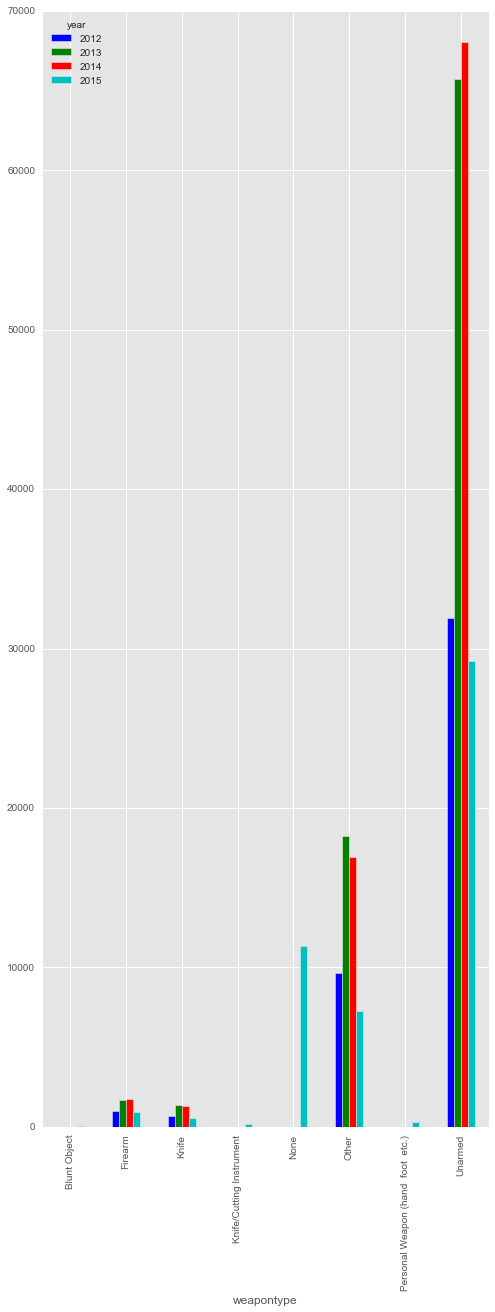

In [41]:
pd.DataFrame(crime_dat.groupby('year').weapontype.value_counts().unstack().fillna(0).T).plot(kind = 'bar')
#

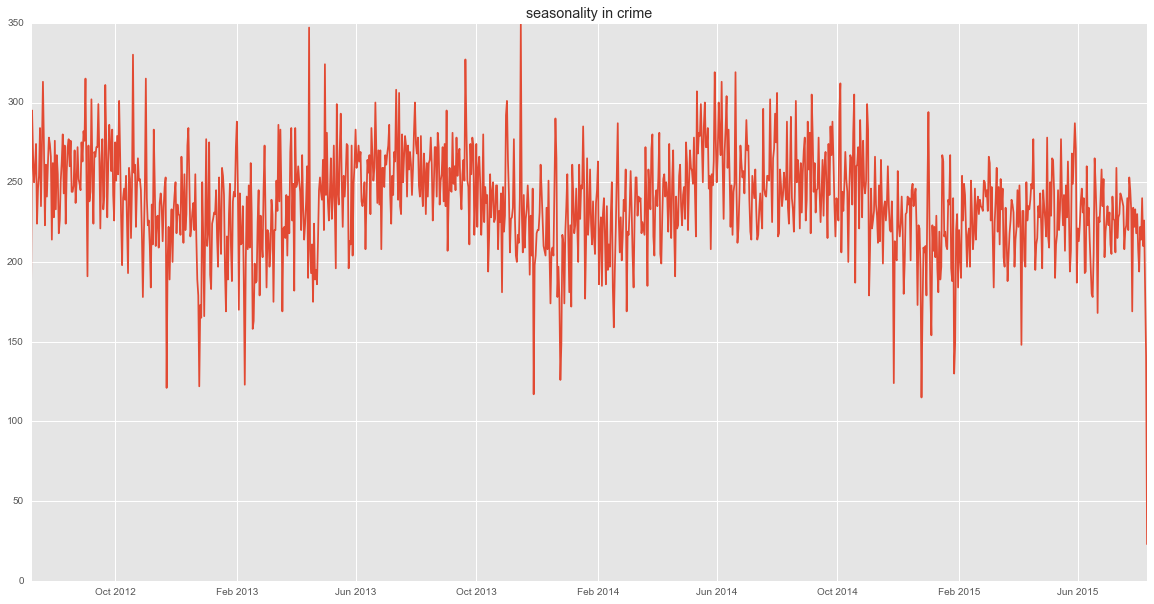

In [42]:
crime_dat['date'].value_counts().plot(figsize =(20,10), title = "seasonality in crime" )